<a href="https://colab.research.google.com/github/RohanRanshinge/USA_Shootings/blob/master/Shootings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# USA Mass Shootings

The project aims to analyze mass shootings that have happened in United States from 1966 to 2017

## Ingestion

In [0]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [51]:
shootings = pd.read_csv("https://raw.githubusercontent.com/RohanRanshinge/USA_Shootings/master/Mass%20Shootings%20Dataset%20Ver%205.csv", encoding = "ISO-8859-1")
shootings.head(2)

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,...,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude
0,1,Texas church mass shooting,"Sutherland Springs, TX",11/5/2017,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,...,46,0.0,26,NaN,NaN,No,White,M,NaN,NaN
1,2,Walmart shooting in suburban Denver,"Thornton, CO",11/1/2017,Wal-Mart,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,...,3,0.0,47,NaN,NaN,No,White,M,NaN,NaN


In [0]:
shootings[['Fatalities','Race']].groupby('Race',as_index=False).count().sort_values(by='Fatalities',ascending=False)
shootings.replace(['White American or European American','white','White','White American or European American/Some other Race',
                   'Black American or African American','Black','black','Black American or African American/Unknown',
                  'Asian American','Asian','Asian American/Some other race',
                  'Some other race','Two or more races','Other'],
                  ['White','White','White','White',
                  'African American','African American','African American','African American',
                  'Asian','Asian','Asian',
                  'Unknown','Unknown','Unknown'],inplace=True)

In [53]:
shootings['Race'].unique()

array(['White', 'African American', 'Asian', nan, 'Latino', 'Unknown',
       'Native American or Alaska Native'], dtype=object)

In [54]:
shootings[['Fatalities','Race']].groupby('Race',as_index=False).count().sort_values(by='Fatalities',ascending=False)

,Race,Fatalities
5,White,144
0,African American,85
4,Unknown,66
1,Asian,18
2,Latino,5
3,Native American or Alaska Native,3


In [55]:
shootings.replace(['M','M/F'],['Male','Male/Female'],inplace=True)
shootings[['Gender','Fatalities']].groupby('Gender',as_index=False).count().sort_values(by='Fatalities',ascending=False)

,Gender,Fatalities
1,Male,292
3,Unknown,21
0,Female,5
2,Male/Female,5


Text(0, 0.5, 'Fatalities')

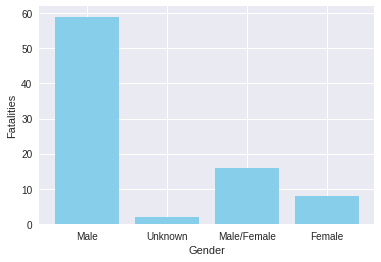

In [56]:
plt.bar(shootings['Gender'],shootings['Fatalities'],align='center',color='skyblue')
plt.xlabel('Gender')
plt.ylabel('Fatalities')

In [0]:
shootings.fillna('0',inplace=True)

In [0]:
shootings['Age'].sort_values()

Text(0, 0.5, 'Fatalities')

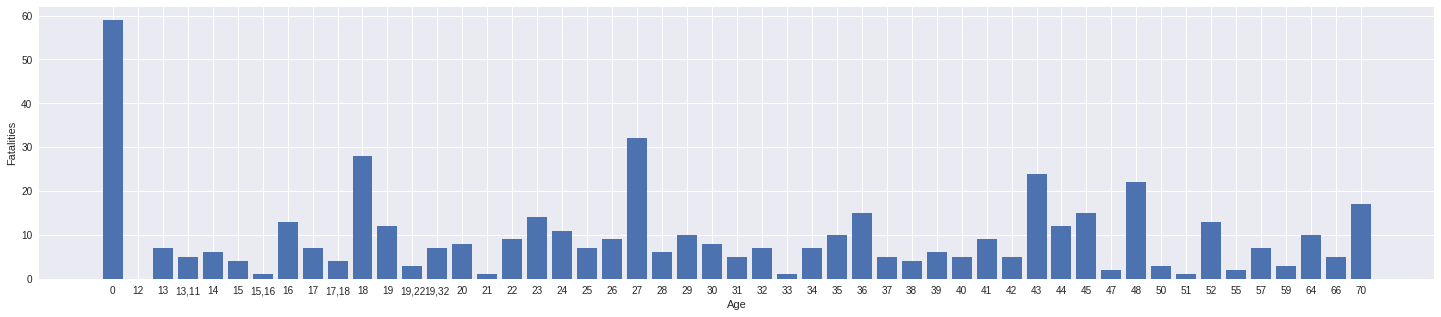

In [62]:
plt.figure(figsize=(25,5))
plt.bar(shootings['Age'].sort_values(),shootings['Fatalities'],align='center',)
plt.xlabel('Age')
plt.ylabel('Fatalities')

<BarContainer object of 323 artists>

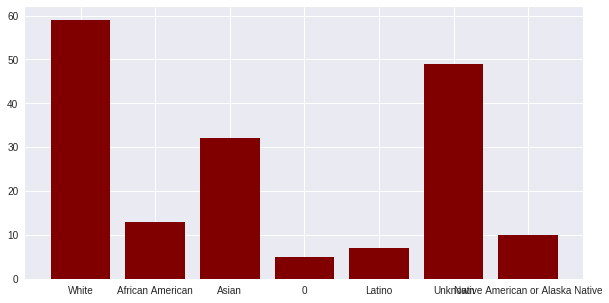

In [73]:
plt.figure(figsize=(10,5))
plt.bar(shootings['Race'],shootings['Fatalities'],align='center',color='maroon')
